# Quantum Computing

## Dirac Notation

A **qubit** is a "quantum bit" that owns a state of either 0 or 1. Unlike in the classical interpretaion that the bit should be either 0 or 1 exclusively at a time, a qubit can be "partially" 0 and partially 1. We specify the "partially" by a complex number called **amplitude**. For example, $|\psi\rangle = \sqrt{0.2}|{0}\rangle + i\sqrt{0.8}|1\rangle$ represents a legal state of a qubit, where $\sqrt{0.2}$ and $i\sqrt{0.8}$ are the amplitudes of state $0$ and $1$, respectively. We call this "$|\rangle$" the **dirac notation**, which is widely used in quantum mechanics.

Here, the certificate for a legal qubit is that the sqaures of the amplitudes sum up to $1$. There will be no surprise if you know that these factors are essentially the square roots of the probability of each state. 

If the state is represented by multiple qubits, we need more factors to describe the probability distribution. In gerneral it's $2^w$ factors for a $w$-qubit state. For example:

$$
    \alpha|00\rangle + \beta|01\rangle + \gamma|10\rangle + \delta|11\rangle \quad \alpha, \beta, \gamma, \delta \in \mathbb{C}
$$

is the general form for 2-qubit quantum states. A concrete example may be $\sqrt{0.1}|00\rangle + \sqrt{0.4}|01\rangle -\sqrt{0.5}|11\rangle$. For simplicity (arguable), we can also write the bits in base 10, in which case we will have $\sqrt{0.1}|0\rangle + \sqrt{0.4}|1\rangle - \sqrt{0.5}|3\rangle$ for the same example.

If we already have two wires each carrying one qubit of states $\psi_1$ and $\psi_2$, how can we get the overall state? i.e. how to get the 4 factors out of the original ones? Say $\psi_1 = \sqrt{0.2}|0\rangle + \sqrt{0.8}|1\rangle$, $\psi_2 = \sqrt{0.4}|0\rangle + \sqrt{0.6}|1\rangle$, the tensor product is helpful here:

$$
\begin{align*}
    \psi &= \psi_1 \otimes \psi_2 \\
    &= (\sqrt{0.2}|0\rangle + \sqrt{0.8}|1\rangle)\otimes(\sqrt{0.4}|0\rangle + \sqrt{0.6}|1\rangle) \\
    &= \sqrt{0.2\times0.4}|00\rangle + \sqrt{0.2\times0.6}|01\rangle + \sqrt{0.8\times0.4}|10\rangle + \sqrt{0.8\times0.6}|11\rangle \\
    &= \sqrt{0.08}|00\rangle + \sqrt{0.12}|01\rangle + \sqrt{0.32}|10\rangle + \sqrt{0.48}|11\rangle
\end{align*}
$$

Note that *not* all states can be derived from tensor products. States that can be represented as a tensor product are called **product states**. Others are called **entangled states**. An example of the latter is $\psi = \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle$, in which case the measured results of the qubits are dependent on each other (say we get 1 for the first qubit, then it's sure the other qubit is 0).

## Vector Notation

Another notation for quantum states is the **vector notation**. Since conventially, each possible state are listed in the increasing order, we can just keep the amplitudes of each state and write them in the vector form. For example, $\psi = \sqrt{0.2}|0\rangle + \sqrt{0.8}|1\rangle$ can be equivalently written as:

$$
    \psi = 
    \begin{bmatrix}
        \sqrt{0.2} \\ \sqrt{0.8}
    \end{bmatrix}
$$

Note that in this notation we cannot omit the items with 0 amplitude.

It's natural to consider each possible state as a basic vector, so that the total state can be represented by the weighed sum of these vectors, just like how we interpret a vector in $\mathbb{R}^k$. For example, for a $w$-qubit state where $w = 2$, we have the following basic vectors in $\mathbb{R}^{2^w}$:

$$
    |00\rangle =
    \begin{bmatrix}
        1 \\ 0 \\ 0 \\ 0
    \end{bmatrix}
    \qquad
    |01\rangle =
    \begin{bmatrix}
        0 \\ 1 \\ 0 \\ 0
    \end{bmatrix}
    \qquad
    |10\rangle =
    \begin{bmatrix}
        0 \\ 0 \\ 1 \\ 0
    \end{bmatrix}
    \qquad
    |11\rangle =
    \begin{bmatrix}
        0 \\ 0 \\ 0 \\ 1
    \end{bmatrix}
$$

Then, a state $\psi = \sqrt{0.08}|00\rangle + \sqrt{0.12}|01\rangle + \sqrt{0.32}|10\rangle + \sqrt{0.48}|11\rangle$ can be written in the following vector form:

$$
\begin{align*}
    \psi &= \sqrt{0.08}|00\rangle + \sqrt{0.12}|01\rangle + \sqrt{0.32}|10\rangle + \sqrt{0.48}|11\rangle \\
    &=
    \sqrt{0.08}\,
    \begin{bmatrix}
        1 & 0 & 0 & 0
    \end{bmatrix}^T + 
    \sqrt{0.12}\,
    \begin{bmatrix}
        0 & 1 & 0 & 0
    \end{bmatrix}^T + 
    \sqrt{0.32}\,
    \begin{bmatrix}
        0 & 0 & 1 & 0
    \end{bmatrix}^T + 
    \sqrt{0.48}\,
    \begin{bmatrix}
        0 & 0 & 0 & 1
    \end{bmatrix} \\
    &= 
    \begin{bmatrix}
        0.08 & 0.12 & 0.32 & 0.48
    \end{bmatrix}^T
\end{align*}
$$

Earlier we've said that the square sum of all amplitudes should be $1$, this can be formally expressed in mathematical form:

$$
    \langle \psi|\psi\rangle = |\psi\rangle(|\psi\rangle^T)^* = 1
$$


We will find vectors very helpful later when doing calculations.

## Simulating Qubits

We will use data structures in python to simulate qubits. Let's first import some useful packages:

In [2]:
import math
import numpy
from numpy import pi, e, kron, sqrt, random
from scipy import sparse
from qiskit import QuantumCircuit
from IPython.display import Javascript
Javascript("Jupyter.notebook.execute_cells([-1,-3])")

<IPython.core.display.Javascript object>

A state can be expressed in the following form:

In [3]:
state = [
    (numpy.sqrt(0.1), '00'),
    (numpy.sqrt(0.4), '01'),
    (numpy.sqrt(0.5), '11')
]

The following function is used to print a state in the dirac notation, one in binary and one in decimal

In [6]:
def print_dirac_binary(state):
    result = '('
    for (p, bits) in state:
        result += str(p) + ' |' + bits + '> + '
    result = result[:-3] + ')'
    print(result)

def print_dirac_decimal(state):
    result = '('
    for (p, bits) in state:
        result += str(p) + ' |' + binary_to_decimal(bits) + '> + '
    result = result[:-3] + ')'
    print(result)

Here's the effect:

In [7]:
print_dirac_binary(state)
print_dirac_decimal(state)

(0.31622776601683794 |00> + 0.6324555320336759 |01> + 0.7071067811865476 |11>)
(0.31622776601683794 |0> + 0.6324555320336759 |1> + 0.7071067811865476 |3>)


We may also want to convert between states and their vector forms:

In [8]:
def state_to_vector(state):
    limit = 2 ** len(state[0][1])
    result = numpy.zeros(limit)
    j = 0
    for i in range(0, limit):
        (p, bits) = state[j]
        if i == int(bits, 2):
            result[i] = p
            j += 1
        else:
            result[i] = 0.0
    return result

def vector_to_state(vec):
    length = math.frexp(len(vec))[1] - 1  
    return [(p, decimal_to_binary(i, length)) for i, p in enumerate(vec)]

Let's see what we've got:

In [9]:
print(state_to_vector(state))
print_dirac_binary(vector_to_state(state_to_vector(state)))

[0.31622777 0.63245553 0.         0.70710678]
(0.31622776601683794 |00> + 0.6324555320336759 |01> + 0.0 |10> + 0.7071067811865476 |11>)


Finally, it could be helpful to write a function to check validity of states and vectors of quantum systems, i.e. whether the possiblilies of states sum up to 1:

In [10]:
def check_state_validity(state):
    s = 0
    for (p, bits) in state:
        s += p * p.conj()
    return math.isclose(s.real, 1.0) and math.isclose(s.imag, 0.0)
def check_vector_validity(vec):
    s = 0
    for p in vec:
        s += p * p.conj()
    return math.isclose(s.real, 1.0) and math.isclose(s.imag, 0.0)

## Quantum Gates

Just like logic gates for classical system, there are **quantum gates** that modify the states of a quantum system. Let's introduce some of them:

### Hadamard Gate

The Hadamard gate operates on a single qubit with the following mapping rule:

$$
    |0\rangle \mapsto \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
    \qquad
    |1\rangle \mapsto \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle
$$

As usual, it can be represented by a matrix:

$$
    H = \frac{1}{\sqrt{2}}
    \begin{bmatrix}
        1 & 1 \\ 1 & -1
    \end{bmatrix}
$$

For a 1-qubit state, we can apply $H$ to it to get the state after the Hadamard gate. Say $\psi = \sqrt{0.5}|0\rangle + \sqrt{0.5}|1\rangle$, then:

$$
    H\psi = 
    \frac{1}{\sqrt{2}}
    \begin{bmatrix}
        1 & 1 \\ 1 & -1
    \end{bmatrix}
    \begin{bmatrix}
        \sqrt{0.5} \\ \sqrt{0.5}
    \end{bmatrix}
    = 
    \begin{bmatrix}
        1 \\ 0
    \end{bmatrix}
    = |0\rangle
$$

A Hadamard gate in quantum circuits are usually depicted in the following form:

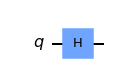

In [11]:
draw_hadamard_gate() # defined at the end of the notebook

### Phase Shift Gate

The phase shift gate has the following rule:

$$
    |0\rangle \mapsto |0\rangle
    \qquad
    |1\rangle \mapsto e^{i\theta}|1\rangle
$$

Here $\theta$ is some given value. Note that the probability of either $|0\rangle$ or $|1\rangle$ doesn't change, since $|e^{i\theta}|$ is always 1. It, however, modifies the phase of the quantum state.

The matrix form is as follows:

$$
    P(\theta) =
    \begin{bmatrix}
        1 & 0 \\ 0 & e^{i\theta}
    \end{bmatrix}
$$

The plot version of a phase shift gate is:

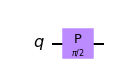

In [12]:
draw_phase_gate(numpy.pi/2) # defined at the end of the notebook

### CNOT Gate

The CNOT gate is a controlled gate that takes two qubits and performs NOT operation on the second qubit (**target**) if the first qubit (**control**) is 1:

$$
    |00\rangle \mapsto |00\rangle
    \qquad
    |01\rangle \mapsto |01\rangle
    \qquad
    |10\rangle \mapsto |11\rangle
    \qquad
    |11\rangle \mapsto |10\rangle
$$

If we carefully look into this tranformation, the output qubit (the second qubit on the right side) is actually the XOR of the input qubit and the control qubit. The difference is that we preserve one of the inputs, namely the control qubit. Thus, it's always possible to reverse the process using that control qubit.

The matrix form of the CNOT gate is:

$$
    \text{CNOT} =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0
    \end{bmatrix}
$$

The CNOT gate is depicted as follows:

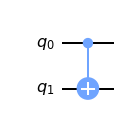

In [13]:
draw_cnot_gate() # defined at the end of the notebook

If we flip the control and target, the CNOT matrix would be:

$$
    \text{CNOT} =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0 \\
        0 & 1 & 0 & 0
    \end{bmatrix}
$$

which can be drawn like:

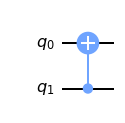

In [14]:
draw_tonc_gate() # defined at the end of the notebook

The three gates introduced above will be our **universal gate set**, like the NAND and NOR gates among the classical gates. In other words, we can use these three gates to perform anything in quantum computing. All the gates we will learn later can be constructed from the universal gates.

Here's a typical quantum circuit consisting of Hadamard, phase shift, and CNOT gates:

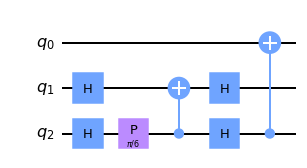

In [15]:
draw_qcircuit_example() # defined at the end of the notebook

We can simulate these gates and quantum circuits by defining variables and functions:

In [16]:
H = numpy.array([[1, 1], [1, -1]]) / numpy.sqrt(2)
def P(theta):
    return numpy.array([[1, 0], [0, numpy.exp(1j * theta)]])
CNOT = numpy.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
TONC = numpy.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])

Let's first try trivial cases to show that these matrices work:

In [17]:
state = state_to_vector([(numpy.sqrt(0.1), '0'), (numpy.sqrt(0.9), '1')])
controlled_state = state_to_vector([(numpy.sqrt(0.1), '00'), (numpy.sqrt(0.2), '01'), (numpy.sqrt(0.3), '10'), (numpy.sqrt(0.4), '11')])
print(H @ state)
print(P(numpy.pi) @ state)
print(CNOT @ controlled_state)

[ 0.89442719 -0.4472136 ]
[ 0.31622777+0.00000000e+00j -0.9486833 +1.16180196e-16j]
[0.31622777 0.4472136  0.63245553 0.54772256]


### Adapt Matrices to Multi-Qubit Circuits

In real quantum circuits, there are always more than one qubits, yet each quantum gate only affect one to several qubits. Therefore, we need to adjust our matrices so that for arbitrary count of qubits we can map them to the correct result.

#### Hadamard Gate

For example, let $\Psi = \sqrt{0.1}|00\rangle + \sqrt{0.2}|01\rangle + \sqrt{0.3}|10\rangle + \sqrt{0.4}|11\rangle$. the Hadamard gate on the second qubit will trasform $\Psi$ into:

$$
    H(2, 2)\Psi = \sqrt{0.1}|00\rangle + \sqrt{0.2}|01\rangle + \frac{\sqrt{0.3} + \sqrt{0.4}}{\sqrt{2}}|10\rangle + \frac{\sqrt{0.3} - \sqrt{0.4}}{\sqrt{2}}|11\rangle
$$

Here $H(i, k)$ stands for an extended Hadamard matrix taht has $k$ qubits in total, but only the $i$-th will be affected. To construct this matrix, we need to find patterns in $H(i, k)$. Let's start with some examples:

$$
    H(1, 2) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}}
    \end{bmatrix}
    \qquad
    H(2, 2) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\
        \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
        0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
    \end{bmatrix} \\
    H(1, 3) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 \\
        0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}} & 0 & 0 & 0 & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & -\frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & -\frac{1}{\sqrt{2}} & 0 \\
        0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & -\frac{1}{\sqrt{2}} \\
    \end{bmatrix}
    \qquad
    H(2, 3) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 \\
        \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 \\
        0 & 0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\
        0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0 \\
        0 & 0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} \\
    \end{bmatrix} \\
    H(3, 3) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & 0 & 0 \\
        \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
        0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
    \end{bmatrix}
$$

If you are aware, $H(1, 2)$ resembles $H(1, 1)$, $H(2, 2)$ resembles $H(1, 1)$, $H(1, 3)$ resembles $H(1, 2)$, and $H(2, 3)$ resembles $H(1, 2)$. To explore these similarities, let's introduce the **Kronecker product** between two matrices. Suppose $A$, $B$ are square matrices of mxm and nxn, then:

$$
    A \otimes B =
    \begin{bmatrix}
        a_{11} & \dots & a_{1m} \\
        \vdots & \ddots & \vdots \\
        a_{m1} & \dots & a_{mm}
    \end{bmatrix}
    \otimes
    \begin{bmatrix}
        b_{11} & \dots & b_{1n} \\
        \vdots & \ddots & \vdots \\
        b_{n1} & \dots & b_{nn}
    \end{bmatrix}
    =
    \begin{bmatrix}
        \begin{matrix}
            a_{11}b_{11} & \dots & a_{11}b_{1n} \\
            \vdots & \ddots & \vdots \\
            a_{11}b_{n1} & \dots & a_{11}b_{nn}
        \end{matrix}
        & \dots &
        \begin{matrix}
            a_{1m}b_{11} & \dots & a_{1m}b_{1n} \\
            \vdots & \ddots & \vdots \\
            a_{1m}b_{n1} & \dots & a_{1m}b_{nn}
        \end{matrix} \\
        \vdots & \ddots & \vdots \\
        \begin{matrix}
            a_{m1}b_{11} & \dots & a_{m1}b_{1n} \\
            \vdots & \ddots & \vdots \\
            a_{m1}b_{m1} & \dots & a_{m1}b_{mm}
        \end{matrix}
        & \dots &
        \begin{matrix}
            a_{mm}b_{11} & \dots & a_{mm}b_{1n} \\
            \vdots & \ddots & \vdots \\
            a_{mm}b_{m1} & \dots & a_{mm}b_{mm}
        \end{matrix}
    \end{bmatrix}
$$

It's almost identical to the tensor product (and even shares the operator), but it restricts the operands to be in a space of matrices. Now look at the examples we gave before, it's not hard to come up with:

$$
    H(1, 2) = H \otimes I \qquad H(2, 2) = I \otimes H \\
    H(1, 3) = H \otimes I \otimes I  \qquad H(2, 3) = I \otimes H \otimes I \qquad H(3, 3) = I \otimes I \otimes H
$$

The pattern is obvious. Let me write down the general form (the product notation used below is *not* conventional, the multiplicative operator should be $\otimes$ instead of $\times$):

$$
    H(i, k) = \left(\prod_1^{i-1} I\right)\otimes H \otimes \left(\prod_{i+1}^k I\right)
$$



#### Phase Shift Gate

With the conclusion of extended Hadamard matrix, we can easily get the extended version of phase shift matrix. $P(\theta, i, k)$, where $i$ , $k$ represent for transformed qubit and the total count of qubits, can be calculated as follows:

$$
    P(\theta, i, k) = \left(\prod_1^{i-1} I\right)\otimes P(\theta) \otimes \left(\prod_{i+1}^k I\right)
$$

#### CNOT Gate

The big challenge comes from the CNOT gate. So far, we *cannot* give a general matrix of the form $CNOT(c, i, k)$, where $c$ is for the control qubit, $i$ for the transformed qubit, and $k$ for the total count of qubits. This will be resolved later in another way to simulate quantum circuits (and we will learn how to contruct its matrix form even later), but for now we will just use $CNOT(i, k)$, where $i$ is the control qubit, and $i + 1$ is the transformed qubit (or conversely).

The following are functions to generate extended matrices for the three quantum gates we discussed before:

In [18]:
# Note that all following indices are 1-indexed.
def hadamard_matrix(i, k):
    if k >= 14:
        print("The input is too large, expect to wait exponential time.")
    return kronecker_product(H, i, k)

def phase_matrix(theta, i, k):
    if k >= 14:
        print("The input is too large, expect to wait exponential time.")
    return kronecker_product(P(theta), i, k)

def cnot_matrix(ctrl, i, k):
    if ctrl + 1 == i:
        return kronecker_product(CNOT, ctrl, k-1)
    elif ctrl - 1 == i:
        return kronecker_product(TONC, i, k-1)
    else:
        print("We cannot do long-range CNOT so far.")
        return numpy.identity(2 ** k)

Now that any gates of any-qubit system can be represented by matrices, we can move on and try to construct a quantum simulator.

## Quantum Simulator


Let's first look at an example of quantum circuit:

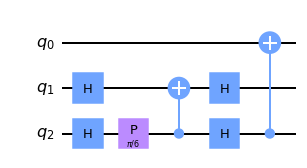

In [19]:
draw_qcircuit_example()

It is equivalent to the following sequence of commands:

```python
QC 3
INITSTATE BASIS |100>
H 1
H 2
P pi/6 2
CNOT 2 1
H 1
H 2
CNOT 2 0
```

The first line gives the count of qubits in the circuit, the second line gives the initial state (if not given, the default input state will be $|0...0\rangle$, and each of the following lines is a gate. The gates are already topologically sorted, so we don't need to worry about the ordering problems. Now, given a text file like the above, we will simulate the qunatum circuit and give random results based on the probabililty of each possible states at the end of the circuit.

We will first need a parser to extract the commands and arguments from a circuit text file:

In [20]:
def read_circuit_file(file_name):
    lines = open(file_name).readlines()
    result = []
    wire_ct = int(lines[0].split()[1])
    for line in lines[1:]:
        result.append(line.split())
    return (wire_ct, result)

Here are parsed data from two prepared examples:

In [21]:
circ_1 = read_circuit_file('data/1.circuit')
print(circ_1)
circ_2 = read_circuit_file('data/2.circuit')
print(circ_2)

FileNotFoundError: [Errno 2] No such file or directory: 'data/1.circuit'

Also, for a final vector of probabilities of states, we would like to define a random number generator to give a result:

In [22]:
def measure(state_vec):
    bits = []
    width = int(math.log(len(state_vec), 2.0))
    for i in range(0, len(state_vec)):
        bits.append(decimal_to_binary(i, width))
    p_vec = (state_vec * state_vec.conj()).view(numpy.float64)[::2]
    while True:
        yield numpy.random.choice(bits, 1, p=p_vec)[0]

### Unitary Matrix

Since each command is essentially a linear transformation, we can represent the whole quantum circuit by a complex matrix $U$, which is the product of all matrices. We call it an **unitary matrix** because it has the following property:

$$
    UU^\dagger = U^\dagger U = I
$$

where $U$ is a square matrix and $U^\dagger$ is its conjugate transpose. For example, for a 2x2 matrix $U \in GL(\mathbb{C})$:

$$
    U = 
    \begin{bmatrix}
        a & b \\ c & d
    \end{bmatrix}
$$

It's conjugate transpose is:

$$
    U^\dagger = 
    \begin{bmatrix}
        a^* & c^* \\ b^* & d^*
    \end{bmatrix}
$$

It's not hard to confirm that all three matrices we had ($H$, $P(\theta)$, and $CNOT$) are unitary, then it's plain that their products are also unitary, since for any unitary matrix $U_1, U_2$, we have:

$$
    \begin{align*}
        (U_1U_2)(U_1U_2)^\dagger &= (U_1U_2)(U_2^\dagger U_1^\dagger) \\
        &= U_1(U_2U_2^\dagger)U_1^\dagger \\
        &= U_1IU_1^\dagger \\
        &= U_1U_1^\dagger = I
    \end{align*}
$$

Here's the function to get the unitary matrix of a quantum circuit:

In [23]:
def init_from_file(file_name):
    lines = open(file_name).readlines()
    state = []
    for line in lines:
        [real, imag] = line.split()
        state.append(float(real) + float(imag) * 1j) 
    return state

def init_from_basis(b, limit):
    try:
        basis = int(b)
    except:
        basis = int(binary_to_decimal(b[1:-1]))
    return [0 for i in range(0, basis)] + [1] + [0 for i in range(basis + 1, limit)] 

def quantum_simulator_1(circ):
    (w, gates) = circ
    limit = 2 ** w
    result = numpy.identity(limit)
    state = []
    
    for g in gates[::-1]:
        if g[0] == 'H':
            i = int(g[1])
            reuslt = result @ hadamard_matrix(i+1, w)
            
        elif g[0] == 'P':
            theta = eval(g[2])     # eval() is to allow inputs like pi/3
            i = int(g[1])
            result = result @ phase_matrix(theta, i+1, w)
            
        elif g[0] == 'CNOT':
            ctrl = int(g[1])
            i = int(g[2])
            result = result @ phase_matrix(ctrl, i+1, w)
            
        elif g[0] == 'INITSTATE':
            if g[1] == 'FILE':
                state = init_from_file(g[2])
            elif g[1] == 'BASIS':
                state = init_from_basis(g[2], limit)
    if (len(state) == 0):
        state = [1] + [0 for i in range(0, limit - 1)]
    return result @ state

Here's an example of constructing the quantum circuit, and generate results from the final vector:

In [24]:
circ = read_circuit_file('./data/input.circuit')
qs = quantum_simulator_1(circ)
mgen = measure(qs)
mlist = []
for i in range(0, 10):
    mlist.append(next(mgen))
print(mlist)

FileNotFoundError: [Errno 2] No such file or directory: './data/input.circuit'

Great! We've made a quantum simulator! But how efficient is it? For a $w$-qubit system, let $N = 2^w$ be the scale of our data. Then, we need a $O(N^2)$ space for the matrices we use throughout the algorithm. Also, suppose there are $g$ gates, each represented by a $O(N^2)$-sized matrix, then a single matrix multiplication will take $O(N^3)$ time. In total, the time complexity is $O(gN^3)$, which is a considerable amount if we plug $w$ in, resulting in a $O(g8^w)$ runtime.

The program will lag severely when our circuit grows. We need a better algorithm.

### State-to-State Transformation

A quick improvement is to keep a state vector, and do multiplication on gate matrices and the vector instead of on the gate matrices themselves, this will likely improve the time complexity, since a $O(N^2)$-scale matrix and a $O(N)$-scale vector takes $O(N^2)$ to do multiplication, and thus it will be $O(gN^2)$, or $O(g4^w)$ in total. The implementation is as follows:

In [25]:
def quantum_simulator_2(circ):
    (w, gates) = circ
    limit = 2 ** w
    
    state = []
    for g in gates:
        if g[0] == 'INITSTATE':
            if g[1] == 'FILE':
                state = init_from_file(g[2])
            elif g[1] == 'BASIS':
                state = init_from_basis(g[2], limit)
    for g in gates[::-1]:
        if g[0] == 'H':
            i = int(g[1])
            state = hadamard_matrix(i+1, w) @ state
            
        elif g[0] == 'P':
            theta = eval(g[2])     # eval() is to allow inputs like pi/3
            i = int(g[1])
            state = phase_matrix(theta, i+1, w) @ state
            
        elif g[0] == 'CNOT':
            ctrl = int(g[1])
            i = int(g[2])
            state = phase_matrix(ctrl, i+1, w) @ state
    return state

The example is almost idential to the previous one, just using a different simulator.

In [26]:
circ = read_circuit_file('./data/input.circuit')
qs = quantum_simulator_2(circ)
mgen = measure(qs)
mlist = []
for i in range(0, 10):
    mlist.append(next(mgen))
print(mlist)

FileNotFoundError: [Errno 2] No such file or directory: './data/input.circuit'

### Sparse Matrix

You may already noticed that our extended gate matrices are composed of mostly zeros and a few non-zero entries. It is doubtless a waste to occupy $O(4^w)$ space to store a matrix; instead, we prefer a "compressed" form of matrix to save time and space resources, it's called a **sparse matrix**. For example, a matrix like the following:

$$
    \begin{bmatrix}
        1 & 0 & 0 & 0 & 2 \\
        3 & 0 & 4 & 0 & 0 \\
        0 & 3 & 0 & 0 & 0 \\
        0 & 0 & 2 & 1 & 0
    \end{bmatrix}
$$

can be described as the following lists:

```python
V = [1, 2, 3, 4, 3, 2, 1]
COL_INDEX = [0, 4, 0, 2, 1, 2, 3]
ROW_INDEX = [0, 2, 4, 5]
```

Here `V` is the list of non-zero entries sorted by row index and then by column index. `COL_INDEX` is the column indices of the non-zero entries, and `ROW_INDEX` is the first entry starting at corresponding row (e.g. the 4th entry (zero-indexed) starts at the 2nd row (zero-indexed), so `ROW_INDEX[2] = 4`). To access an entry at $i, j$, we can first slice `V` with `V[ROW_INDEX[i]:ROW_INDEX[i+1]]` to locate the row, and find appearance of $j$ within the slice. If it's found at `k`, the element we search for is `V[COL_INDEX[k]]`; otherwise, it is zero.

It's clear that there are only $O(N)$ non-zeros in our gate matrices, so the time and space complexity are both estimated $O(N)$.

The example above takes up 18 slots to store entries while the original matrix needs 20. This doesn't seem a big save. However, the scale of matrices grows exponetially in quantum circuits, so it will definitely be a sensible choice. We'll use `scipy.sparse` library to do this. We will start with the sparse version of our gate matrices:

In [ ]:
def hadamard_matrix_sparse(i, k):
    if k >= 14:
        print("The input is too large, expect to wait exponential time.")
    return kronecker_product_sparse(H, i, k);

def phase_matrix_sparse(theta, i, k):
    if k >= 14:
        print("The input is too large, expect to wait exponential time.")
    return kronecker_product_sparse(P(theta), i, k)

def cnot_matrix_sparse(ctrl, i, k):
    return sparse.csr_matrix(numpy.identity(2 ** k))

Notice that we simply substitute `sparse.kron` for `numpy.kron` and `sparse.matrix_csr` for `numpy.array`. The logic remains the same.

In [ ]:
def quantum_simulator_3(circ):
    (w, gates) = circ
    limit = 2 ** w
    
    state = []
    for g in gates:
        if g[0] == 'INITSTATE':
            if g[1] == 'FILE':
                state = init_from_file(g[2])
            elif g[1] == 'BASIS':
                state = init_from_basis(g[2], limit)
    for g in gates[::-1]:
        if g[0] == 'H':
            i = int(g[1])
            state = hadamard_matrix_sparse(i+1, w) @ state
            
        elif g[0] == 'P':
            theta = eval(g[2])     # eval() is to allow inputs like pi/3
            i = int(g[1])
            state = phase_matrix_sparse(theta, i+1, w) @ state
            
        elif g[0] == 'CNOT':
            ctrl = int(g[1])
            i = int(g[2])
            state = phase_matrix_sparse(ctrl, i+1, w) @ state
    return state

In [ ]:
circ = read_circuit_file('./data/input.circuit')
qs = quantum_simulator_3(circ)
mgen = measure(qs)
mlist = []
for i in range(0, 10):
    mlist.append(next(mgen))
print(mlist)

To show the performance differences between the discussed three simulators, let's do a benchmark. We'll generate fixed number of quantum gates for $w$-qubit systems, where $w$ grows from $2$ (so that CNOT won't be excluded) to some relatively large number, say $20$ (note that here it has exceeded $8^{20} \approx 1\times 10^{18}$ units of time for the first simulator). To run this benchmark, let's first write a random gate generator:

In [ ]:
def random_gate_text(w):
    gate = random.randint(3)
    arg = random.randint(w)
    if gate == 0:
        return 'H ' + str(arg)
    elif gate == 1:
        theta = random.rand() * 2 * pi
        return 'P ' + str(arg) + ' ' + str(theta)
    elif gate == 2:
        # So far we can only deal with CNOT gates whose control and target wires are adjacent
        return 'CNOT ' + str(arg) + ' ' + str(arg + 1 if arg != w - 1 else arg - 1)
    
def random_circuit_text(w, ct):
    result = 'QC ' + str(w) + '\n'
    result += 'INITSTATE BASIS |' + '0'*w + '>\n'
    for i in range(0, ct):
        result += random_gate_text(w) + '\n'
    return result

def write_circuit_file(file_name, circ_text):
    f = open(file_name, "w")
    f.write(circ_text)
    f.close()
    
def generate_circuit_files(bit_ct, gate_ct, test_ct):
    for i in range(0, test_ct):
        write_circuit_file('./data/benchmark_dataset/'+str(bit_ct)+'-'+str(gate_ct)+'_'+str(i)+'.circuit', random_circuit_text(bit_ct, gate_ct))
        i += 1

Let's first generate the circuit files:

In [ ]:
%%time
for qubit_ct in range(1, 21):
    for gate_ct in range(10, 20):
        generate_circuit_files(qubit_ct, gate_ct, 10)

In [ ]:
init_from_basis('010', 16)

In [ ]:
cnot_matrix(1, 2, 3)

## Non-atomic Gates

Merely three gates cannot build a powerful quantum machine. We need more gates to express the logic in the circuits. Of course, they are constructed with our universal gate set, i.e. the Hadamard gate, the phase shift gate, and the CNOT gate. Here are a miscellaneous collection of the gates we may be interested.

### Pauli Gates

Here's our old friend back in classical circuits. An NOT gate does is defined as follows:

$$
    |0\rangle \mapsto |1\rangle \qquad |1\rangle \to |0\rangle
$$

The matrix for an NOT gate is:

$$
    X = 
    \begin{bmatrix}
        0 & 1 \\ 1 & 0
    \end{bmatrix}
$$

It's also known as the **Pauli-X gate**. We can derive it from the Hadamard gate and phase shift gate: $X = HP(\pi)H$ (this can be easily confirmed). Here, the $P(\pi)$ matrix represents the **Pauli-Z gate** defined as follows:

$$
    |0\rangle \mapsto |0\rangle \qquad |1\rangle \mapsto -|1\rangle
$$

whose matrix definition is:

$$
    Z = 
    \begin{bmatrix}
        1 & 0 \\ 0 & -1
    \end{bmatrix}
$$

Of course, there should be one other **Pauli-Y gate**. You could have noticed that the Pauli-X and Pauli-Y gates may perform on some symmetries. It may be helpful to introduce the **Bloch sphere**, a geometric representation of a two-level quantum mechanical system, which is exactly the $1$-qubit scenario we've been talking about.

<img src="./images/bloch_sphere.png" width=200 height=200>

This is a unit sphere whose axes represents the following states:

$$
    \begin{align*}
    \begin{cases}
        \hat{\mathbf{x}} &= \quad |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
        -\hat{\mathbf{x}} &= \quad |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) 
    \end{cases}
    &&
    \begin{cases}
        \hat{\mathbf{y}} &= \quad |i+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle) \\
        -\hat{\mathbf{y}} &= \quad |i-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)   
    \end{cases}
    &&
    \begin{cases}
        \hat{\mathbf{z}} &= \quad |0\rangle \\
        -\hat{\mathbf{z}} &= \quad |1\rangle
    \end{cases}
    \end{align*}
$$

It might be tricky to find out what these axes really means from above, but we can get some insights from the general form of a $1$-qubit quantum state $|\Psi\rangle$:

$$
    |\Psi\rangle = \cos\frac{\theta}{2}|0\rangle + e^{i\varphi}\sin\frac{\theta}{2}|1\rangle
$$

Then, the Pauli-X transformation is simply rotate $\Psi$ around the $x$ axis of the Bloch sphere by $\pi$. The Pauli-Z transformation makes $\Psi$ rotate around the $z$ axis by $\pi$. We can easily check them:

$$
    \begin{align*}
        \Psi_{x, \pi} &= \cos\frac{\pi - \theta}{2}|0\rangle + e^{i\varphi}\sin\frac{\pi - \theta}{2}|1\rangle \\
        &= \sin\frac{\theta}{2}|0\rangle + e^{i\varphi}\cos\frac{\theta}{2}|1\rangle \\
        &= \cos\frac{\theta}{2}|1\rangle + e^{-i\varphi}\sin\frac{\theta}{2}|0\rangle \tag{Adjust the phase}\\
        \Psi_{z, \pi} &= \cos\frac{\theta}{2}|0\rangle + e^{i(\pi + \varphi)}\sin\frac{\theta}{2}|1\rangle \\
        &= \cos\frac{\theta}{2}|0\rangle - e^{i\varphi}\sin\frac{\theta}{2}|1\rangle \tag{Adjust the phase}
    \end{align*}
$$

Thus, it's natural to introduce the Pauli-Y tranformation as rotating around the $y$ axis by $\pi$:

$$
    \begin{align*}
        \Psi_{y, \pi} &= \cos\frac{\pi - \theta}{2}|0\rangle + e^{i(\pi - \varphi)}\sin\frac{\pi - \theta}{2}|1\rangle \\
        &= \sin\frac{\theta}{2}|0\rangle - e^{-i\varphi}\cos\frac{\theta}{2}|1\rangle \\
        &= -\cos\frac{\theta}{2}|1\rangle + e^{i\varphi}\sin\frac{\theta}{2}|0\rangle \tag{Adjust the phase}\\
        &= \cos\frac{\theta}{2}|1\rangle - ie^{i\varphi}\sin\frac{\theta}{2}|0\rangle \tag{Adjust the phase}
    \end{align*}
$$

This gives us a definition of the Pauli-Y gate:

$$
    |0\rangle \mapsto i|1\rangle \qquad |1\rangle \mapsto -i|0\rangle
$$

whose matrix representation is:

$$
    Y = 
    \begin{bmatrix}
        0 & -i \\ i & 0
    \end{bmatrix}
$$

Note that it's only a matter of phase when choosing the definition of Pauli-Y transformation, but the adopted version has more algebraic properties than the real matrix:

$$
    Y_\text{real} =
    \begin{bmatrix}
        0 & - 1 \\ 1 & 0
    \end{bmatrix}
$$

since the complex one generates the [**Pauli Group**](https://en.wikipedia.org/wiki/Pauli_group) together with the Pauli-X and Pauli-Z, which we'd prefer not to elaborate here.

Finally, it's not hard to verify the following properties with repect to the Pauli gates:

$$
    X^2 = Y^2 = Z^2 = -iXYZ = I
$$

The Pauli gates built from the existing gates are illustrated as follows:

In [ ]:
draw_pauli_x_gate()

In [ ]:
draw_pauli_y_gate()

In [ ]:
draw_pauli_z_gate()

In [ ]:
# to avoid numerical error, I prefer to use the direct definition here
X = numpy.array([[0, 1], [1, 0]])        # X = H @ Z @ H
Y = numpy.array([[0, -1j], [1j, 0]])     # Y = P(pi/2) @ X @ P(-pi/2)
Z = numpy.array([[1, 0], [0, -1]])       # Z = P(pi)

### Rotation Operator Gates

A more general form of the Pauli gates is to rotate around the axes of the Bloch sphere by *any* angle. The definition is:

$$
    R_x(\theta) = e^{-i\frac{\theta}{2}X} \qquad R_y(\theta) = e^{-i\frac{\theta}{2}Y} \qquad R_z(\theta) = e^{-i\frac{\theta}{2}Z}
$$

Here the notation $e^{i\theta A}$ where the matrix appears at the exponent is defined as:

$$
    \begin{align*}
        e^{i\theta A}
        &= \sum_{n=0}^\infty \frac{1}{n!}(i\theta A)^n \\
        &= \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}(\theta A)^{2n} + i\sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}(\theta A)^{2n+1} \tag{Here we use the fact that $A^2 = I$} \\
        &= I\cos\theta + iA\sin\theta
    \end{align*}
$$

Thus, the more detailed definition is:

$$
    R_x(\theta) =
    \begin{bmatrix}
        \cos\tfrac{\theta}{2} & -i\sin\tfrac{\theta}{2} \\
        -i\sin\tfrac{\theta}{2} & \cos\tfrac{\theta}{2}
    \end{bmatrix}
    \qquad
    R_y(\theta) = 
    \begin{bmatrix}
        \cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\
        \sin\frac{\theta}{2} & \cos\frac{\theta}{2}
    \end{bmatrix}
    \qquad
    R_z(\theta) = 
    \begin{bmatrix}
        e^{-i\frac{\theta}{2}} & 0 \\
        0 & e^{i\frac{\theta}{2}}
    \end{bmatrix}
$$

Again, we need to find some way to construct these matrices from the ones we have ($H$, $P$, $X$, etc.). I do this quite randomly, but I'd like to share some thoughts on the direction I take. This is probably not the most efficient way, but it's how I figure it out.

First, I believe the three rotation matrices are somehow symmetric, so it should be easy to obtain the other two once I figure out $R_x$. Then, I decide to start from the rotation matrix, and try to map it to a familiar matrix. I notice that $R_x$ has separated $\cos$ and $\sin$ entries, which is annoying since we don't seemingly have any matrices to eliminate a single trignometric function. An idea is to use $H$ to add $\cos$ and $\sin$ terms together and transform it into exponential form, which can be dealt with phase shift matrix then:

$$
    \begin{align*}
        R_xH &= 
        \begin{bmatrix}
            \cos\frac{\theta}{2} & -i\sin\frac{\theta}{2} \\
            -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
        \end{bmatrix}
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            1 & 1 \\ 1 & -1
        \end{bmatrix} \\
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            e^{-i\frac{\theta}{2}} & e^{i\frac{\theta}{2}} \\
            e^{-i\frac{\theta}{2}} & -e^{i\frac{\theta}{2}}
        \end{bmatrix}
    \end{align*}
$$

Then apply the $P(-i\theta/2)$ to the right:

$$
    \begin{align*}
        R_xHP(-i\frac{\theta}{2})
        &=
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            e^{-i\frac{\theta}{2}} & e^{i\frac{\theta}{2}} \\
            e^{-i\frac{\theta}{2}} & -e^{i\frac{\theta}{2}}
        \end{bmatrix}
        \begin{bmatrix}
            1 & 0 \\ 0 & e^{-i\frac{\theta}{2}}
        \end{bmatrix} \\
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            e^{-i\frac{\theta}{2}} & 1 \\
            e^{-i\frac{\theta}{2}} & -1
        \end{bmatrix}
    \end{align*}
$$

It seems that we eliminate a pair of $e^{i\theta/2}$ using the phase shift matrix. Now it's time to eliminate the other pair. We'd want to flip the two columns first, with the Pauli-X matrix:

$$
    \begin{align*}
        R_XHP(-\frac{\theta}{2})XP(\frac{\theta}{2})
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            e^{-i\frac{\theta}{2}} & 1 \\
            e^{-i\frac{\theta}{2}} & -1
        \end{bmatrix}    
        \begin{bmatrix}
            0 & 1 \\ 1 & 0
        \end{bmatrix}
        \begin{bmatrix}
            1 & 0 \\ 0 & e^{i\frac{\theta}{2}}
        \end{bmatrix} \\
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            1 & e^{-i\frac{\theta}{2}} \\
            -1 & e^{-i\frac{\theta}{2}}
        \end{bmatrix}
        \begin{bmatrix}
            1 & 0 \\ 0 & e^{i\frac{\theta}{2}}
        \end{bmatrix} \\
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            1 & 1 \\
            -1 & 1
        \end{bmatrix}
    \end{align*}
$$

I find this matrix resembles the Hadamard matrix a lot. In fact, they only differ by a Pauli-X transformation. Hereby, we make it to the end of the chain:

$$
    R_x(\theta)HP(-\frac{\theta}{2})XP(\frac{\theta}{2})XH \equiv I \tag{*}
$$

Now, to get a formula for $R_X$, we just multiply the inverse matrices to the right of both sides. Thankfully these matrices are either **involutary** or conceptually easy to inverse (like the phase shift matrix):

$$
    R_x(\theta) = HXP(-\frac{\theta}{2})XP(\frac{\theta}{2})H
$$

Finally, we need to expand the definition of $X$ and get rid of redundant matrices:

$$
    \begin{align*}
        R_x(\theta) &= H(HZH)P(-\frac{\theta}{2})(HZH)P(\frac{\theta}{2})H \\
        &= P(\pi)HP(-\frac{\theta}{2})HP(\pi)HP(\frac{\theta}{2})H
    \end{align*}
$$

The other two rotation matrices don't come so straight. I tried to replace $X$ in $(*)$ by $Y$ or $Z$, but we get something other than the identity matrix:

$$
    \begin{align*}
        R_y(\theta)HP(-\frac{\theta}{2})YP(\frac{\theta}{2})YH
        &=
        \begin{bmatrix}
            -i & 0 \\ 0 & i
        \end{bmatrix} \\
        R_z(\theta)HP(-\frac{\theta}{2})ZP(\frac{\theta}{2})ZH
        &=
        \begin{bmatrix}
            0 & 1 \\ -1 & 0
        \end{bmatrix}
    \end{align*}
$$

It's not hard to recognize that they are $YX$ and $ZX$ respectively. So here are the formulae:

$$
    \begin{align*}
        R_y(\theta) 
        &= YXHYP(-\frac{\theta}{2})YP(\frac{\theta}{2})H \\
        &= \left[P(\frac{\pi}{2})XP(-\frac{\pi}{2})\right]XH\left[P(\frac{\pi}{2})XP(-\frac{\pi}{2})\right]P(-\frac{\theta}{2})\left[P(\frac{\pi}{2})XP(-\frac{\pi}{2})\right]P(\frac{\theta}{2})H \\
        &= P(\frac{\pi}{2})(HZH)P(-\frac{\pi}{2})(HZH)HP(\frac{\pi}{2})(HZH)P(-\frac{\pi}{2})P(-\frac{\theta}{2})P(\frac{\pi}{2})(HZH)P(-\frac{\pi}{2})P(\frac{\theta}{2})H \\
        &= P(\frac{\pi}{2})HP(\pi)HP(-\frac{\pi}{2})HP(-\frac{\pi}{2})HP(\pi)HP(-\frac{\theta}{2})HP(\pi)HP(-\frac{\pi}{2})P(\frac{\theta}{2})H \\
        R_z(\theta) 
        &= ZXHZP(-\frac{\theta}{2})ZP(\frac{\theta}{2})H \\
        &= P(\pi)(HZH)HP(\pi)P(-\frac{\theta}{2})P(\pi)P(\frac{\theta}{2})H \\
        &= P(\pi)HP(-\frac{\theta}{2})P(\pi)P(\frac{\theta}{2})H
    \end{align*}
$$

In [ ]:
def RX(theta):
    arg = theta / 2
    return numpy.array([[numpy.cos(arg), -1j * numpy.sin(arg)], [-1j * numpy.sin(arg), numpy.cos(arg)]])
def RY(theta):
    arg = theta / 2
    return numpy.array([[numpy.cos(arg), -numpy.sin(arg)], [numpy.sin(arg), numpy.cos(arg)]])
def RZ(theta):
    arg = theta / 2
    return numpy.array([[e ** (-1j * arg), 0], [0, e ** (1j * arg)]])

In [ ]:
def RX1(theta):
    arg = theta / 2
#     return H @ X @ P(-arg) @ X @ P(arg) @ H
    return Z @ H @ P(-arg) @ H @ Z @ H @ P(arg) @ H
def RY1(theta):
    arg = theta / 2
#     return Y @ X @ H @ Y @ P(-arg) @ Y @ P(arg) @ H
    return P(pi/2) @ H @ Z @ H @ P(-pi/2) @ H @ Z @ P(pi/2) @ H @ Z @ H @ P(-pi/2) @ P(-arg) @ P(pi/2) @ H @ Z @ H @ P(-pi/2) @ P(arg) @ H
def RZ1(theta):
    arg = theta / 2
#     return Z @ X @ H @ Z @ P(-arg) @ Z @ P(arg) @ H
    return Z @ H @ P(-arg) @ Z @ P(arg) @ H

### Swap Gate

Before we move on to controlled phase gates, there's an important gate to mention, that is the **swap gate**. It operates on two qubits with the following effect:

$$
    |00\rangle \mapsto |00\rangle \qquad |01\rangle \mapsto |10\rangle \qquad |10\rangle \mapsto |01\rangle \qquad |11\rangle \mapsto |11\rangle
$$

Its matrix form is:

$$
    \text{SWAP} = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1
    \end{bmatrix}
$$

Recall the alternative interpretation of the CNOT gate, that it does the **XOR** operation on the control and target qubits and stores the result in the target qubit while preserving the control qubit. There is actually a trick to swap two integers with XOR:

```python
x = x ^ y
y = x ^ y
x = x ^ y
```
In each statement, there's one variable modified and the other preserved, just like the CNOT transformation. Thus, we can get the following matrix:

$$
    \text{SWAP}(i, j) = \text{CNOT}(i, j)\text{CNOT}(j, i)\text{CNOT}(i, j)
$$

We still haven't resolved the "long-ranged" CNOT problem (we will talk about it very soon), so let's stick to adjacent swap first. The matrix is defined in python as follows:

In [ ]:
SWAP = CNOT @ TONC @ CNOT

Swap gates are extremely helpful when it comes to multi-qubit matrix construction. Recall the issue that we cannot discover a good way to calculate $CNOT(c, i, k)$, where $c$ is the control qubit, $i$ is the target qubit, and $k$ is the count of qubits. Now that we have the SWAP gate, we swap qubit by qubit until the control and target are adjacent; then we swap it way back to the initial place. For example, look at the following circuit:

In [ ]:
qc = QuantumCircuit(3)
qc.cx(0, 2)
qc.draw(output='mpl')

It's equivalent to the following circuit:

In [ ]:
qc = QuantumCircuit(3)
qc.swap(1, 2)
qc.cx(0, 1)
qc.swap(1, 2)
qc.draw(output='mpl')

We first write the extended swap matrix:

In [ ]:
def swap_matrix(i, j, k):
    # swap the i-th and (i+1)-th qubit
    def swap_adjacent(i, k):
        

Let's then implement the complete version of `cnot_matrix`:

In [ ]:
def cnot_matrix(ctrl, i, k):
    ascend = ctrl - i >= 1
    descend = i - ctrl >= 1
    result = numpy.identity(2 ** k)
    if ascend:
        for j in range(i, ctrl-1):
            result = swap_matrix(j, j + 1, k) @ result
        result = kronecker_product(CNOT, i, k - 1) @ result
        for j in range(ctrl-1, i, -1):
            result = swap_matrix(j, j - 1, k) @ result
    elif descend:
        for j in range(i, ctrl+1, -1):
            result = swap_matrix(j, j - 1, k) @ result
        result = kronecker_product(TONC, i, k - 1) @ result
        for j in range(ctrl+1, i):
            result = swap_matrix(j, j + 1, k) @ result
    return result

In [ ]:
show_matrix_pattern(cnot_matrix(1, 2, 3))
show_matrix_pattern(kron(TONC, I2))

In [ ]:
show_matrix_pattern(cnot_matrix(3, 2, 3))
show_matrix_pattern(kron(I2, TONC))

In [ ]:
show_matrix_pattern(kron(I2, CNOT))

In [ ]:
numpy.identity(3)

## Utilities

There are some helpful functions I wrote to better complete this post. Run the following cells right after the import statements to ensure the validity of code above.

In [5]:
def binary_to_decimal(binary):
    result = 0
    for d in binary:
        result = result * 2 + int(d)
    return str(result)

def decimal_to_binary(decimal, length):
    result = bin(decimal)[2:]    # abandon the '0b' prefix
    return '0'*(length - len(result)) + result

def draw_hadamard_gate():
    qc = QuantumCircuit(1, name='Hadamard')
    qc.h(0)
    return qc.draw(output='mpl')

def draw_phase_gate(theta):
    qc = QuantumCircuit(1, name='Phase')
    qc.p(theta, 0)
    return qc.draw(output='mpl')

def draw_cnot_gate():
    qc = QuantumCircuit(2, name='CNOT')
    qc.cx(0, 1)
    return qc.draw(output='mpl')

def draw_tonc_gate():
    qc = QuantumCircuit(2, name='TONC')
    qc.cx(1, 0)
    return qc.draw(output='mpl')

def draw_pauli_x_gate():
    qc = QuantumCircuit(1, name='Pauli-X (NOT)')
    qc.h(0)
    qc.z(0)
    qc.h(0)
    return qc.draw(output='mpl')

def draw_pauli_y_gate():
    qc = QuantumCircuit(1, name='Pauli-Y')
    qc.p(pi/2, 0)
    qc.x(0)
    qc.p(-pi/2, 0)
    return qc.draw(output='mpl')
    
def draw_pauli_z_gate():
    qc = QuantumCircuit(1, name='Pauli-Z')
    qc.p(pi, 0)
    return qc.draw(output='mpl')

def draw_qcircuit_example():
    qc = QuantumCircuit(3)
    qc.h(1)
    qc.h(2)
    qc.p(numpy.pi / 6, 2)
    qc.cx(2, 1)
    qc.h(1)
    qc.h(2)
    qc.cx(2, 0)
    return qc.draw(output='mpl')

# calculate I x ... x mat x ... x I
# where `x` is the kronecker operator
def kronecker_product(mat, i, k):
    result = numpy.array([[1]])
    for j in range(1, i):
        result = numpy.kron(result, I2)
    result = numpy.kron(result, mat)
    for j in range(i + 1, k + 1):
        result = numpy.kron(result, I2)
    return result

# same as `kronecker_product` but the matrix is sparse
def kronecker_product_sparse(mat, i, k):
    result = sparse.csr_matrix([[1]])
    for j in range(1, i):
        result = sparse.kron(result, I2)
    result = sparse.kron(result, mat)
    for j in range(i + 1, k + 1):
        result = sparse.kron(result, I2)
    return result

# turn a numpy.matrix to a tex matrix.
# saves me tons of time
def matrix_to_tex(mat):
    result = '\\begin{bmatrix}\n'
    (row_ct, col_ct) = mat.shape
    for i in range(0, row_ct):
        tmp = '    '
        for j in range(0, col_ct):
            curr = mat[i, j]
            if math.isclose(curr, 0):
                tmp += '0'
            elif math.isclose(curr, 1):
                tmp += '1'
            elif math.isclose(curr, 1 / numpy.sqrt(2)):
                tmp += '\\frac{1}{\\sqrt{2}}'
            elif math.isclose(curr, -1 / numpy.sqrt(2)):
                tmp += '-\\frac{1}{\\sqrt{2}}'
            else:
                tmp += str(mat[i, j])
            tmp += ' & '
        result += tmp[:-2] + '\\\\\n'
    result += '\\end{bmatrix}'
    print(result)
    
def show_matrix_pattern(mat, black='■', blank='□'):
    result = ''
    (row_ct, col_ct) = mat.shape
    for i in range(0, row_ct):
        for j in range(0, col_ct):
            result += blank if math.isclose(abs(mat[i, j]), 0) else black
            result += ' '         # a half space
        result += '\n'
    print(result)
    
def approximate(mat, l=0):
    result = []
    (row_ct, col_ct) = mat.shape
    for i in range(0, row_ct):
        result.append([])
        for j in range(0, col_ct):
            result[i].append(round(mat[i, j].real, l) + 1j * round(mat[i, j].imag, l))
    return result

Also, I defined several variables for convenience:

In [4]:
I2 = numpy.identity(2, dtype='complex128')
R2 = numpy.array([[0, 1], [1, 0]], dtype='complex128')
S2 = sparse.csr_matrix(I2)